In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [21]:
def calc_ci(array, z=1.96): # Z = 1.96 for 95% CI
    x_bar = np.mean(array)
    s = np.std(array)
    n = len(array)
    lower = x_bar - (z * (s/math.sqrt(n)))
    upper = x_bar + (z * (s/math.sqrt(n)))
    med = np.median(array)
    return lower, med, upper

In [10]:
labels = pd.read_csv('/home/rjsietsma/capice_projects/capice_diagnostics/datafiles_old/test.txt.gz', sep='\t')
labels

/home/rjsietsma/PycharmProjects/capice_updatr/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (55,63,73,112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#Chrom,Allergy/Immunology/Infectious,Alt,AnnoType,Audiologic/Otolaryngologic,Biochemical,CCDS,CDSpos,Cardiovascular,ConsDetail,...,relProtPos,relcDNApos,revel,sift,source,tOverlapMotifs,targetScan,to_be_deleted,verPhCons,verPhyloP
0,21,False,G,CodingTranscript,False,False,CCDS13617.1,872.0,False,stop_lost,...,1.003448,0.883570,NaN,NaN,unknown,NaN,NaN,False,1.000,1.521
1,X,False,C,CodingTranscript,False,False,CCDS55462.1,1971.0,False,synonymous,...,0.572300,0.373821,NaN,0.000,clinvar,NaN,NaN,False,0.004,-1.525
2,17,False,T,CodingTranscript,False,False,CCDS42292.1,843.0,True,synonymous,...,0.098979,0.098672,NaN,0.647,clinvar,NaN,NaN,False,0.991,-0.055
3,21,False,T,CodingTranscript,False,False,CCDS13635.1,222.0,True,synonymous,...,0.601626,0.344434,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.309
4,1,False,A,CodingTranscript,False,False,CCDS39.1,768.0,True,synonymous,...,0.351648,0.149653,NaN,0.000,clinvar,NaN,NaN,False,0.997,0.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,17,False,A,CodingTranscript,False,False,CCDS42292.1,2709.0,True,synonymous,...,0.318070,0.248853,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.989
10838,11,True,T,CodingTranscript,False,False,CCDS7753.1,75.0,True,synonymous,...,0.170068,0.199045,NaN,0.000,clinvar,NaN,NaN,False,0.943,0.189
10839,15,False,C,CodingTranscript,False,False,CCDS32232.1,2673.0,True,synonymous,...,0.310345,0.266162,NaN,0.664,clinvar,NaN,NaN,False,0.999,4.269
10840,19,True,A,CodingTranscript,False,False,CCDS12366.1,1767.0,False,synonymous,...,0.524021,0.343704,NaN,0.000,clinvar,NaN,NaN,False,0.996,-0.044


In [9]:
labels['binarized_label'].value_counts()

0    5421
1    5421
Name: binarized_label, dtype: int64

In [13]:
labels['chr_pos_ref_alt'] = labels[['#Chrom', 'Pos', 'Ref', 'Alt']].astype(str).agg('_'.join, axis=1)
labels

,#Chrom,Allergy/Immunology/Infectious,Alt,AnnoType,Audiologic/Otolaryngologic,Biochemical,CCDS,CDSpos,Cardiovascular,ConsDetail,...,relProtPos,relcDNApos,revel,sift,source,tOverlapMotifs,targetScan,to_be_deleted,verPhCons,verPhyloP
0,21,False,G,CodingTranscript,False,False,CCDS13617.1,872.0,False,stop_lost,...,1.003448,0.883570,NaN,NaN,unknown,NaN,NaN,False,1.000,1.521
1,X,False,C,CodingTranscript,False,False,CCDS55462.1,1971.0,False,synonymous,...,0.572300,0.373821,NaN,0.000,clinvar,NaN,NaN,False,0.004,-1.525
2,17,False,T,CodingTranscript,False,False,CCDS42292.1,843.0,True,synonymous,...,0.098979,0.098672,NaN,0.647,clinvar,NaN,NaN,False,0.991,-0.055
3,21,False,T,CodingTranscript,False,False,CCDS13635.1,222.0,True,synonymous,...,0.601626,0.344434,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.309
4,1,False,A,CodingTranscript,False,False,CCDS39.1,768.0,True,synonymous,...,0.351648,0.149653,NaN,0.000,clinvar,NaN,NaN,False,0.997,0.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,17,False,A,CodingTranscript,False,False,CCDS42292.1,2709.0,True,synonymous,...,0.318070,0.248853,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.989
10838,11,True,T,CodingTranscript,False,False,CCDS7753.1,75.0,True,synonymous,...,0.170068,0.199045,NaN,0.000,clinvar,NaN,NaN,False,0.943,0.189
10839,15,False,C,CodingTranscript,False,False,CCDS32232.1,2673.0,True,synonymous,...,0.310345,0.266162,NaN,0.664,clinvar,NaN,NaN,False,0.999,4.269
10840,19,True,A,CodingTranscript,False,False,CCDS12366.1,1767.0,False,synonymous,...,0.524021,0.343704,NaN,0.000,clinvar,NaN,NaN,False,0.996,-0.044


In [14]:
for col in labels.columns:
    print(col)

#Chrom
Allergy/Immunology/Infectious
Alt
AnnoType
Audiologic/Otolaryngologic
Biochemical
CCDS
CDSpos
Cardiovascular
ConsDetail
ConsScore
Consequence
CpG
Craniofacial
Dental
Dermatologic
Dist2Mutation
Domain
Dst2SplType
Dst2Splice
EncExp
EncH3K27Ac
EncH3K4Me1
EncH3K4Me3
EncNucleo
EncOCC
EncOCCombPVal
EncOCDNasePVal
EncOCDNaseSig
EncOCFairePVal
EncOCFaireSig
EncOCctcfPVal
EncOCctcfSig
EncOCmycPVal
EncOCmycSig
EncOCpolIIPVal
EncOCpolIISig
Endocrine
Exon
FeatureID
Freq10000bp
Freq1000bp
Freq100bp
GC
Gastrointestinal
GeneID
GeneName
General
Genitourinary
GerpN
GerpRS
GerpRSpval
GerpS
Grantham
Hematologic
Intron
Length
Musculoskeletal
Neurologic
Obstetric
Oncologic
Ophthalmologic
PHRED
PolyPhenCat
PolyPhenVal
Pos
Pulmonary
Rare10000bp
Rare1000bp
Rare100bp
RawScore
Ref
Renal
SIFTcat
SIFTval
Segway
Sngl10000bp
Sngl1000bp
Sngl100bp
Stars
TFBS
TFBSPeaks
TFBSPeaksMax
Type
allvalid
bStatistic
binarized_label
cDNApos
cHmmBivFlnk
cHmmEnh
cHmmEnhBiv
cHmmEnhG
cHmmHet
cHmmQuies
cHmmReprPC
cHmmReprPCWk


In [11]:
data = pd.read_csv('/home/rjsietsma/capice_projects/capice_diagnostics/datafiles_old/test_capice.txt.gz', sep='\t')
data

,chr_pos_ref_alt,GeneName,FeatureID,Consequence,probabilities
0,21_33974174_C_G,C21orf59,ENST00000290155,STOP_LOST,0.003275
1,X_99661625_G_C,PCDH19,ENST00000373034,SYNONYMOUS,0.000075
2,17_29509638_C_T,NF1,ENST00000358273,SYNONYMOUS,0.001511
3,21_35742999_C_T,KCNE2,ENST00000290310,SYNONYMOUS,0.000621
4,1_2160973_G_A,SKI,ENST00000378536,SYNONYMOUS,0.000012
...,...,...,...,...,...
10837,17_29556342_G_A,NF1,ENST00000358273,SYNONYMOUS,0.000139
10838,11_5248177_A_T,HBB,ENST00000335295,SYNONYMOUS,0.069934
10839,15_48787324_T_C,FBN1,ENST00000316623,SYNONYMOUS,0.909190
10840,19_17947957_G_A,JAK3,ENST00000458235,SYNONYMOUS,0.001238


In [69]:
merge = data.merge(labels[['chr_pos_ref_alt', 'binarized_label']])
merge

,chr_pos_ref_alt,GeneName,FeatureID,Consequence,probabilities,binarized_label
0,21_33974174_C_G,C21orf59,ENST00000290155,STOP_LOST,0.003275,0
1,X_99661625_G_C,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0
2,17_29509638_C_T,NF1,ENST00000358273,SYNONYMOUS,0.001511,0
3,21_35742999_C_T,KCNE2,ENST00000290310,SYNONYMOUS,0.000621,0
4,1_2160973_G_A,SKI,ENST00000378536,SYNONYMOUS,0.000012,0
...,...,...,...,...,...,...
10837,17_29556342_G_A,NF1,ENST00000358273,SYNONYMOUS,0.000139,1
10838,11_5248177_A_T,HBB,ENST00000335295,SYNONYMOUS,0.069934,1
10839,15_48787324_T_C,FBN1,ENST00000316623,SYNONYMOUS,0.909190,1
10840,19_17947957_G_A,JAK3,ENST00000458235,SYNONYMOUS,0.001238,1


In [71]:
merge[['chr', 'pos', 'ref', 'alt']] = merge['chr_pos_ref_alt'].str.split('_', expand=True)
merge.drop(columns='chr_pos_ref_alt', inplace=True)
merge

,GeneName,FeatureID,Consequence,probabilities,binarized_label,chr,pos,ref,alt
0,C21orf59,ENST00000290155,STOP_LOST,0.003275,0,21,33974174,C,G
1,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0,X,99661625,G,C
2,NF1,ENST00000358273,SYNONYMOUS,0.001511,0,17,29509638,C,T
3,KCNE2,ENST00000290310,SYNONYMOUS,0.000621,0,21,35742999,C,T
4,SKI,ENST00000378536,SYNONYMOUS,0.000012,0,1,2160973,G,A
...,...,...,...,...,...,...,...,...,...
10837,NF1,ENST00000358273,SYNONYMOUS,0.000139,1,17,29556342,G,A
10838,HBB,ENST00000335295,SYNONYMOUS,0.069934,1,11,5248177,A,T
10839,FBN1,ENST00000316623,SYNONYMOUS,0.909190,1,15,48787324,T,C
10840,JAK3,ENST00000458235,SYNONYMOUS,0.001238,1,19,17947957,G,A


In [74]:
merge['order'] = merge['chr']
merge.loc[merge[merge['order'] == 'X'].index, 'order'] = 23
merge.loc[merge[merge['order'] == 'Y'].index, 'order'] = 24
merge.loc[merge[merge['order'] == 'MT'].index, 'order'] = 25
merge['order'] = merge['order'].astype(int)
merge.sort_values(by=['order', 'pos'], inplace=True)
merge.drop(columns='order', inplace=True)
merge.index = range(0, merge.shape[0])
merge

,GeneName,FeatureID,Consequence,probabilities,binarized_label,chr,pos,ref,alt
0,AGL,ENST00000294724,NON_SYNONYMOUS,0.000446,0,1,100340326,G,A
1,AGL,ENST00000294724,FRAME_SHIFT,0.973992,1,1,100342111,TG,T
2,AGL,ENST00000294724,STOP_GAINED,0.910350,1,1,100346885,G,A
3,AGL,ENST00000294724,FRAME_SHIFT,0.684197,1,1,100346952,G,GA
4,AGL,ENST00000294724,CANONICAL_SPLICE,0.812289,1,1,100349675,G,A
...,...,...,...,...,...,...,...,...,...
10837,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0,X,99661625,G,C
10838,PCDH19,ENST00000373034,NON_SYNONYMOUS,0.863940,0,X,99662275,C,G
10839,PCDH19,ENST00000373034,STOP_GAINED,0.998694,0,X,99663098,G,GT
10840,SRPX2,ENST00000373004,NON_SYNONYMOUS,0.001957,0,X,99917338,G,A


In [75]:
merge['sample'] = merge.index

In [76]:
benign_scores = merge[merge['binarized_label'] == 0]['probabilities']
percentile_benign = np.percentile(benign_scores, 5)
benign_lower_ci, benign_med, benign_upper_ci = calc_ci(benign_scores)

In [77]:
patho_scores = merge[merge['binarized_label'] == 1]['probabilities']
percentile_patho = np.percentile(patho_scores, 95)
patho_lower_ci, patho_med, patho_upper_ci = calc_ci(patho_scores)

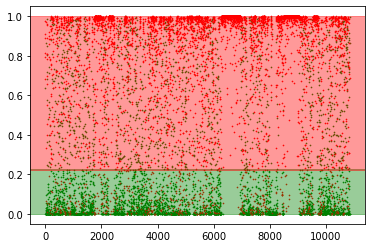

In [79]:
dot_size = 0.4

benign_subset = merge[merge['binarized_label'] == 0]
plt.scatter(benign_subset['sample'], benign_subset['probabilities'], s=dot_size, color='green')
if percentile_benign - benign_lower_ci < 0:
    plot_b_lower_bound = 0
else:
    plot_b_lower_bound - benign_lower_ci
plot_b_upper_bound = percentile_benign + benign_upper_ci
plt.axhspan(plot_b_lower_bound, plot_b_upper_bound, 0, 1, color='green', alpha=0.4)

patho_subset = merge[merge['binarized_label'] == 1]
plt.scatter(patho_subset['sample'], patho_subset['probabilities'], s=dot_size, color='red')
if percentile_patho + patho_upper_ci > 1:
    plot_p_upper_bound = 1
else:
    plot_p_upper_bound = patho_upper_ci
plot_p_lower_bound = percentile_patho - patho_lower_ci
plt.axhspan(plot_p_lower_bound, plot_p_upper_bound, 0, 1, color='red', alpha=0.4)

plt.show()

In [49]:
n = benign_scores.size
benign_scores.sort_values(ascending=True)[:round(n/100*95)]

236     0.000001
5381    0.000001
1885    0.000002
248     0.000002
4986    0.000002
          ...   
3262    0.907855
2451    0.908095
1129    0.908600
1318    0.908690
737     0.908852
Name: probabilities, Length: 5150, dtype: float64

In [50]:
n

5421